<a href="https://colab.research.google.com/github/srohith99/AboutMe/blob/main/Experiment%202%20%E2%80%93%20Support%20Vector%20Machine%20(SVM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load Iris CSV
data = pd.read_csv("/content/iris.csv")
print(data.head())

# Identify features and target
# Usually iris.csv has columns:
# sepal_length, sepal_width, petal_length, petal_width, species

X = data.drop("variety", axis=1)
y = data["variety"]

# Convert species names to numbers
y = y.astype('category').cat.codes

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# SVM Model (Linear Kernel)
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Predictions
pred = model.predict(X_test)

# Accuracy
print("\nAccuracy:", accuracy_score(y_test, pred))

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, pred))

# Support vectors
print("\nNumber of support vectors for each class:")
print(model.n_support_)

print("\nSupport Vectors:")
print(model.support_vectors_)

   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa

Accuracy: 1.0

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Number of support vectors for each class:
[ 3 11 10]

Support Vectors:
[[4.8 3.4 1.9 0.2]
 [5.1 3.3 1.7 0.5]
 [4.5 2.3 1.3 0.3]
 [5.6 3.  4.5 1.5]
 [5.4 3.  4.5 1.5]
 [6.7 3.  5.  1.7]
 [5.9 3.2

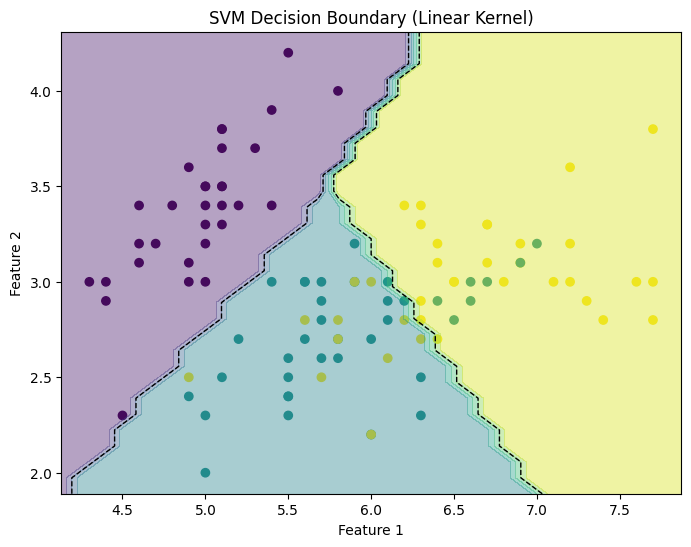

In [69]:
import matplotlib.pyplot as plt
import numpy as np

# Choose two features for visualization
X_vis = X_train.iloc[:, :2].values  # first two features
y_vis = y_train

# Train another SVM using only 2 features for visualization
vis_model = SVC(kernel='linear')
vis_model.fit(X_vis, y_vis)

# Plotting the decision boundary
plt.figure(figsize=(8,6))

# Plot points
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, cmap='viridis')

# Create grid
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

# Predict the class for each point on the grid
Z = vis_model.predict(xy).reshape(XX.shape)

# Draw decision regions with contourf
plt.contourf(XX, YY, Z, cmap='viridis', alpha=0.4) # Use a colormap for regions

# Draw boundaries between predicted classes
# The levels are set at the midpoint between class labels to show the decision lines.
plt.contour(XX, YY, Z, levels=np.arange(Z.max() + 1) - 0.5, linewidths=1, colors='k', linestyles='dashed')

plt.title("SVM Decision Boundary (Linear Kernel)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()